In [1]:
building_name = 'Building_1'

In [2]:
# Parameters
building_name = "Building_1"


In [3]:
!pip install import-ipynb

  Using cached import_ipynb-0.2-py3-none-any.whl.metadata (2.3 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached decorator-5.2.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached fastjsonschema-2.21.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached jsonschema_specifications-2025.4.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
  Using cached wcwidth-0.2.13-py2.py3-none-any.whl.metadata (14 kB)
Using cached import_ipynb-0.2-py3-none-any.whl (4.0 kB)
   ---------------------------------------- 0.0/611.0 kB ? eta -:--:--
   ------ --------------------------------- 102.4/611.0 kB 5.8 MB/s eta 0:00:01
   --------------- ------------------------ 235.5/611.0 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 611.0/611.0 kB 4.8 MB/s eta 0:00:00
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached fastjsonschema-2.21.1-py3-none-any.whl (23 kB)
   -----------------------

ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'C:\\Python312\\Scripts\\pywin32_postinstall.py'
Consider using the `--user` option or check the permissions.



In [4]:
!pip install papermill


  Using cached papermill-2.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached nbclient-0.10.2-py3-none-any.whl.metadata (8.3 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached entrypoints-0.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached ansicolors-1.1.8-py2.py3-none-any.whl.metadata (9.0 kB)
     ---------------------------------------- 0.0/76.3 kB ? eta -:--:--
     ------------------------------------- -- 71.7/76.3 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 76.3/76.3 kB 1.4 MB/s eta 0:00:00
  Using cached jupyter_core-5.8.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached traitlets-5.14.3-py3-none-any.whl.metadata (10 kB)
  Using cached fastjsonschema-2.21.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached jsonschema-4.2

ERROR: Could not install packages due to an OSError: [WinError 2] Das System kann die angegebene Datei nicht finden: 'C:\\Python312\\Scripts\\tqdm.exe' -> 'C:\\Python312\\Scripts\\tqdm.exe.deleteme'



In [5]:
# System operations
import os

# Type hinting
from typing import Any, List, Mapping, Tuple, Union

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

import import_ipynb

# Data manipulation
import numpy as np
import pandas as pd
import gymnasium as gym
from gymnasium import spaces
import torch as th

# CityLearn
from citylearn.data import DataSet
from citylearn.reward_function import RewardFunction, SolarPenaltyReward

# Baseline RL algorithms
from stable_baselines3 import SAC
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv, VecMonitor, VecNormalize
from stable_baselines3.common.callbacks import EvalCallback, CallbackList
from stable_baselines3.common.monitor import Monitor

Couldn't import dot_parser, loading of dot files will not be possible.


In [6]:
# set all plotted figures without margins
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
%matplotlib inline

In [7]:
DATASET_NAME = 'citylearn_challenge_2023_phase_3_1'
schema = DataSet().get_schema(DATASET_NAME)


In [8]:
# Building
root_directory = schema['root_directory']

# change the suffix number in the next code line to a

# Weather data
filename = schema['buildings'][building_name]['weather']
filepath = os.path.join(root_directory, filename)
weather_data = pd.read_csv(filepath)
# Pricing data (simple)
filename = schema['buildings'][building_name]['pricing']
filepath = os.path.join(root_directory, filename)
pricing_data = pd.read_csv(filepath)
# Carbon Intensity data
filename = schema['buildings'][building_name]['carbon_intensity']
filepath = os.path.join(root_directory, filename)
carbon_intensity_data = pd.read_csv(filepath)
# building data
filename = schema['buildings'][building_name]['energy_simulation']
filepath = os.path.join(root_directory, filename)
building_data = pd.read_csv(filepath)
display(building_data.head())
display(building_data.describe(include='all'))

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature (C),Average Unmet Cooling Setpoint Difference (C),Indoor Relative Humidity (%),Equipment Electric Power (kWh),DHW Heating (kWh),Cooling Load (kWh),Heating Load (kWh),Solar Generation (W/kW),Occupant Count (people),Temperature Set Point (C),HVAC Mode (Off/Cooling/Heating)
0,6,1,2,0,22.428127,-0.794095,78.008001,0.356269,0.055730,0.000000,0.0,0.0,3.0,23.222222,1
1,6,2,2,0,22.223214,0.000992,79.042718,0.344522,0.159217,0.227737,0.0,0.0,3.0,22.222222,1
2,6,3,2,0,22.222226,0.000004,79.337523,0.338227,0.056899,0.132294,0.0,0.0,3.0,22.222222,1
3,6,4,2,0,22.222226,0.000004,79.581156,0.334329,0.000000,0.152979,0.0,0.0,3.0,22.222222,1
4,6,5,2,0,22.222226,0.000003,79.783525,0.348094,0.000000,0.119001,0.0,0.0,3.0,22.222222,1


,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature (C),Average Unmet Cooling Setpoint Difference (C),Indoor Relative Humidity (%),Equipment Electric Power (kWh),DHW Heating (kWh),Cooling Load (kWh),Heating Load (kWh),Solar Generation (W/kW),Occupant Count (people),Temperature Set Point (C),HVAC Mode (Off/Cooling/Heating)
count,2208.000000,2208.000000,2208.000000,2208.0,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.0,2208.000000,2208.000000,2208.000000,2208.0
mean,7.010870,12.500000,3.978261,0.0,24.127535,-0.018776,59.200654,0.611653,0.203282,2.832108,0.0,181.965621,2.285326,24.146311,1.0
std,0.814387,6.923755,2.000335,0.0,1.210651,0.171864,4.966167,0.814862,0.438131,1.643799,0.0,228.982415,0.846712,1.219651,0.0
min,6.000000,1.000000,1.000000,0.0,20.000008,-2.543717,45.069613,0.308113,0.000000,0.000000,0.0,0.000000,0.000000,20.000000,1.0
25%,6.000000,6.750000,2.000000,0.0,23.333403,-0.000026,56.135186,0.354607,0.000000,1.775248,0.0,0.000000,2.000000,23.333333,1.0
50%,7.000000,12.500000,4.000000,0.0,24.444372,0.000007,58.611239,0.403186,0.000000,2.550615,0.0,27.846772,3.000000,24.444444,1.0
75%,8.000000,18.250000,6.000000,0.0,24.444454,0.000090,61.912185,0.522546,0.203143,3.610280,0.0,388.286173,3.000000,24.444444,1.0
max,8.000000,24.000000,7.000000,0.0,27.222278,0.172056,80.558754,7.458969,4.529509,10.852755,0.0,712.919243,3.000000,27.222222,1.0


### Deep Q-Learning Agent
#### Reward Function


In [9]:
class CustomReward(RewardFunction):
    def __init__(self, capacity: float):
        self.capacity = capacity
        self.prev_net_load = None

    def __call__(self, obs: Mapping[str, float], action_frac: float) -> float:
        # 1) Net load & cost
        net_load   = obs['non_shiftable_load'] - action_frac*self.capacity # max: 11.25 kW
        price = obs['Electricity Pricing [$/kWh]'] # 0.06605 or 0.03025
        cost  = max(0.0, net_load) * price # deviation range: 0-11.25*0.06605 = ~0-0.75$
        #norm_cost = cost / 0.75 # normalize to [0,1]

        # return -(w_cost*cost + w_pen*comfort_penalty + w_emis*emis + w_ramp*ramp)        
        # return -(w_cost*norm_cost + w_penalty*norm_comfort_penalty)
        return -cost


        # multi-objective reinforcement learning (MORL) / multi-criteria optimization.
        """
        # Comfort-Penalty
        # I use Category II of the Standard 16798-1/2 of REHVA using the PMV-PPD method for buildings with an active cooling system. 
        # Temperature in summer: 23-26 °C
        # Temperature in winter: 20-24 °C
        # deviation range: ~0-5 °C
        comfort_penalty = 0.0
        temp, rel_hum = obs['indoor_dry_bulb_temperature'], obs['indoor_relative_humidity']
        if temp<20: comfort_penalty += (20-temp) 
        if temp>24: comfort_penalty += (temp-24)
        norm_comfort_penalty = comfort_penalty / 5.0 # normalize to [0,1]

        # Relative Humidity: 40-60% 
        if rel_hum<30: comfort_penalty += (40-rel_hum)*0.05
        if rel_hum>60: comfort_penalty += (rel_hum-60)*0.05
        
        # Optional: Emissions, Ramping
        emis = max(0.0, net_load) * obs['kg_CO2/kWh']
        if self.prev_net_load is None:
            ramp = 0.0
        else:
            ramp = abs(net_load - self.prev_net_load)
        self.prev_net_load = net_load
        
        # weights
        w_cost, w_penalty = 0.5, 0.5
        #w_cost, w_pen, w_emis, w_ramp = 0.35, 0.35, 0.25, 0.05
        
        - normalize to same scale
        - rework reward function: transform to same scale and test different weights
        - look into Stable Baselines 3 documentation for reward: 
        if it even converges to 0: hat probleme damit bei reward funktionen zu 0 zu konvergieren, 
        maximiert das immer gegen +/- unendlich
        - workaround: calculate cost without batterie/pv and with it and maximize the difference
        """

#### DQN Environment
I wrap the DataFrames in a Gym Environment
following the same pattern as the tutorial’s Tabular QL wrapper,
but here I implement a custom `gym.Env` that emits a vector of normalized
features and accepts a *discrete* charge/discharge action.


In [10]:
class CityLearnDQNEnv(gym.Env):
    def __init__(self,
                 building_df: pd.DataFrame,
                 pricing_df:  pd.DataFrame,
                 weather_df:  pd.DataFrame,
                 carbon_df:   pd.DataFrame,
                 n_bins:      int = 5):
        super().__init__()
        # Data
        self.bld = building_df.reset_index(drop=True)
        self.prc = pricing_df.reset_index(drop=True)
        self.wth = weather_df.reset_index(drop=True)
        self.car = carbon_df.reset_index(drop=True)
        self.T   = len(self.bld) # number of timesteps in one episode = 2208

        self.n_bins     = n_bins
        self.action_space = spaces.Discrete(n_bins)

        # Observation space params
        self.obs_cols = [
            # building_df
            'month', 'hour', 'day_type', 'daylight_savings_status',
            'indoor_dry_bulb_temperature',
            'average_unmet_cooling_setpoint_difference',
            'indoor_relative_humidity',
            'non_shiftable_load', 'dhw_demand',
            'cooling_demand', 'heating_demand',
            'solar_generation', 'occupant_count',
            'temperature_set_point', 'hvac_mode',
            # weather_df
            'outdoor_dry_bulb_temperature',
            'outdoor_relative_humidity',
            'diffuse_solar_irradiance',
            'direct_solar_irradiance',
            # carbon_df + pricing_df
            'kg_CO2/kWh',
            'Electricity Pricing [$/kWh]'
        ]
        self.obs_amount = len(self.obs_cols)
        self.bound = 5.0  # clip extreme outliers to ±5σ (cover 99.99994% of value)
        low  = -np.ones(self.obs_amount, dtype=np.float32) * self.bound
        high =  np.ones(self.obs_amount, dtype=np.float32) * self.bound

        # Observation space: Box of params, with every param having mean 0, std 1, bounds [-5, 5]
        self.observation_space = spaces.Box(low, high, dtype=np.float32)

        # Compute mean and std for each feature
        all_obs = pd.concat([
            self.bld[self.obs_cols[:15]],
            self.wth[self.obs_cols[15:19]],
            self.car[['kg_CO2/kWh']],
            self.prc[['Electricity Pricing [$/kWh]']]
        ], axis=1)
        self.obs_mean = all_obs.mean().values.astype(np.float32)
        self.obs_std  = all_obs.std().values.astype(np.float32)

        # Simple battery
        self.capacity = 1.0
        self.soc      = 0.5
        
        # Reward function
        self.reward_fn = CustomReward(capacity=self.capacity)
        #self.reward_fn = SolarPenaltyReward()

    def reset(self, seed=None, options=None):
        # Set seed if passed
        if seed is not None:
            self.np_random, _ = gym.utils.seeding.np_random(seed) # reproducable randomness, not used yet TODO
        self.t   = 0
        self.soc = 0.5
        info = {}
        return self._get_obs(), info

    def _get_obs(self):
        row = {}
        for c in self.obs_cols[:15]:
            row[c] = self.bld.loc[self.t, c]
        for c in self.obs_cols[15:19]:
            row[c] = self.wth.loc[self.t, c]
        row['kg_CO2/kWh']               = self.car.loc[self.t, 'kg_CO2/kWh']
        row['Electricity Pricing [$/kWh]'] = self.prc.loc[self.t, 'Electricity Pricing [$/kWh]']

        x = np.array([row[c] for c in self.obs_cols], dtype=np.float32)
        
        # Calculate z-score normalization (mean=0, std=1) and clip to ±5std
        z = (x - self.obs_mean) / self.obs_std
        np.clip(x, -5.0, 5.0, out=x)
        
        return z

    def step(self, action):
        # Action → fraction of charge/discharge
        frac = -1.0 + 2.0 * (action / (self.n_bins - 1)) # action [0, n] -> charge/discharge [-1, 1]

        # SoC-Update
        self.soc = float(np.clip(self.soc + 0.1 * frac,
                                 0.0, self.capacity))

        # Observation to dict
        obs_dict = {c: self.bld.loc[self.t, c] for c in [
            'non_shiftable_load',
            'indoor_dry_bulb_temperature',
            'indoor_relative_humidity',
        ]}
        obs_dict['Electricity Pricing [$/kWh]'] = self.prc.loc[self.t, 'Electricity Pricing [$/kWh]']
        obs_dict['kg_CO2/kWh'] = float(self.car.loc[self.t, 'kg_CO2/kWh'])
                
        reward = self.reward_fn(obs_dict, frac)
        # reward = self.reward_fn.calculate(obs_dict) # Citylearn SolarPenaltyReward 
        
        # Increase time and get next observation array
        self.t += 1
        terminated = (self.t >= self.T) # after 2208 timesteps one episode is done
        truncated = False  # no time limit
        obs = self._get_obs() if not terminated else np.zeros(len(self.obs_cols), dtype=np.float32)
        info = {}
        return obs, reward, terminated, truncated, info

    def render(self, mode='human'): pass

In [11]:
# Test how many outliers get clipped by the 5std bounds
# For building 1: 3 outliers
"""
# 1) Reconstruct your “observation” DataFrame in raw units
raw_df = pd.concat([
    bld[[
        'month', 'hour', 'day_type', 'daylight_savings_status',
        'indoor_dry_bulb_temperature',
        'average_unmet_cooling_setpoint_difference',
        'indoor_relative_humidity',
        'non_shiftable_load', 'dhw_demand',
        'cooling_demand', 'heating_demand',
        'solar_generation', 'occupant_count',
        'temperature_set_point', 'hvac_mode'
    ]].reset_index(drop=True),
    wth[[
        'outdoor_dry_bulb_temperature',
        'outdoor_relative_humidity',
        'diffuse_solar_irradiance',
        'direct_solar_irradiance'
    ]].reset_index(drop=True),
    car[['kg_CO2/kWh']].reset_index(drop=True),
    prc[['Electricity Pricing [$/kWh]']].reset_index(drop=True)
], axis=1)

# 2) Compute mean, std, ±5σ bounds, and actual min/max
stats = raw_df.describe().T[['mean','std']].copy()
stats['lower_5sigma'] = stats['mean'] - 5 * stats['std']
stats['upper_5sigma'] = stats['mean'] + 5 * stats['std']
stats['min']          = raw_df.min()
stats['max']          = raw_df.max()
stats['below_lower']  = stats['min']  < stats['lower_5sigma']
stats['above_upper']  = stats['max']  > stats['upper_5sigma']

# 3) See which features (if any) would get clipped:
print(stats[['mean','std','lower_5sigma','upper_5sigma','min','max','below_lower','above_upper']])
"""

"\n# 1) Reconstruct your “observation” DataFrame in raw units\nraw_df = pd.concat([\n    bld[[\n        'month', 'hour', 'day_type', 'daylight_savings_status',\n        'indoor_dry_bulb_temperature',\n        'average_unmet_cooling_setpoint_difference',\n        'indoor_relative_humidity',\n        'non_shiftable_load', 'dhw_demand',\n        'cooling_demand', 'heating_demand',\n        'solar_generation', 'occupant_count',\n        'temperature_set_point', 'hvac_mode'\n    ]].reset_index(drop=True),\n    wth[[\n        'outdoor_dry_bulb_temperature',\n        'outdoor_relative_humidity',\n        'diffuse_solar_irradiance',\n        'direct_solar_irradiance'\n    ]].reset_index(drop=True),\n    car[['kg_CO2/kWh']].reset_index(drop=True),\n    prc[['Electricity Pricing [$/kWh]']].reset_index(drop=True)\n], axis=1)\n\n# 2) Compute mean, std, ±5σ bounds, and actual min/max\nstats = raw_df.describe().T[['mean','std']].copy()\nstats['lower_5sigma'] = stats['mean'] - 5 * stats['std']\nstats

In [12]:
# Adjust column names to match the CityLearn schema
bld = building_data.copy()
bld = bld.rename(columns={
    'Month': 'month',
    'Hour': 'hour',
    'Day Type': 'day_type',
    'Daylight Savings Status': 'daylight_savings_status',
    'Indoor Temperature (C)': 'indoor_dry_bulb_temperature',
    'Average Unmet Cooling Setpoint Difference (C)': 'average_unmet_cooling_setpoint_difference',
    'Indoor Relative Humidity (%)': 'indoor_relative_humidity',
    'Equipment Electric Power (kWh)': 'non_shiftable_load',
    'DHW Heating (kWh)': 'dhw_demand',
    'Cooling Load (kWh)': 'cooling_demand',
    'Heating Load (kWh)': 'heating_demand',
    'Solar Generation (W/kW)': 'solar_generation',
    'Occupant Count (people)': 'occupant_count',
    'Temperature Set Point (C)': 'temperature_set_point',
    'HVAC Mode (Off/Cooling/Heating)': 'hvac_mode'
})
print(bld.columns.tolist())

# 2) Rename weather data columns
wth = weather_data.rename(columns={
    'Outdoor Drybulb Temperature (C)': 'outdoor_dry_bulb_temperature',
    'Outdoor Relative Humidity (%)':    'outdoor_relative_humidity',
    'Diffuse Solar Radiation (W/m2)':   'diffuse_solar_irradiance',
    'Direct Solar Radiation (W/m2)':    'direct_solar_irradiance',
})
prc = pricing_data.copy()
car = carbon_intensity_data.copy()


['month', 'hour', 'day_type', 'daylight_savings_status', 'indoor_dry_bulb_temperature', 'average_unmet_cooling_setpoint_difference', 'indoor_relative_humidity', 'non_shiftable_load', 'dhw_demand', 'cooling_demand', 'heating_demand', 'solar_generation', 'occupant_count', 'temperature_set_point', 'hvac_mode']


In [13]:
class TrainLoggerCallback(BaseCallback):
    """Logging State, Action, Reward per step and Loss per update phase."""
    def __init__(self, verbose=0):
        super().__init__(verbose)
        # Will collect a dict per env-step
        self.rows = []
        # Loss values and their timesteps (global)
        self.losses = []
        self.loss_timesteps = []
        # Completed episode returns (global list)
        self.episode_rewards = []
        # Placeholders for per-env tracking
        self._current_ep_rewards = []         # sum of rewards in current episode per env
        self._current_ep_counts = []          # episode index per env
        self._current_step_in_episode = []    # step counter (0..T-1) per env

        # DataFrames to populate at end
        self.df = pd.DataFrame()
        self.ep_df = pd.DataFrame()

    def _on_training_start(self) -> None:
        try:
            n_envs = self.training_env.num_envs
        except AttributeError:
            n_envs = 1
        # initialize counters per sub-env
        self._current_ep_rewards = [0.0] * n_envs
        self._current_ep_counts = [1] * n_envs
        self._current_step_in_episode = [0] * n_envs
        super()._on_training_start()

    def _on_step(self) -> bool:
        obs_vec = self.locals.get("new_obs")
        acts    = self.locals.get("actions")
        rews    = self.locals.get("rewards")
        dones   = self.locals.get("dones")
        step    = int(self.num_timesteps)

        # log loss if present
        loss_val = self.logger.name_to_value.get("train/loss")
        if loss_val is not None:
            self.losses.append(float(loss_val))
            self.loss_timesteps.append(step)

        # iterate each sub-env
        for idx, (obs, act, rew, done) in enumerate(zip(obs_vec, acts, rews, dones)):
            # flatten observation
            flat = obs.flatten().tolist()
            # build row with metadata
            row = {f"x{i}": flat[i] for i in range(len(flat))}
            row.update({
                "env_id": idx,
                "episode": self._current_ep_counts[idx],
                "step_in_ep": self._current_step_in_episode[idx],
                "action": int(act),
                "reward": float(rew),
                "global_step": step
            })
            self.rows.append(row)

            # accumulate per-episode reward
            self._current_ep_rewards[idx] += float(rew)
            # increment step in episode
            self._current_step_in_episode[idx] += 1

            # if end of episode for this env
            if done:
                # log reward and finalize episode
                print(f"Env {idx} Episode {self._current_ep_counts[idx]} done at global step {step}, total reward: {self._current_ep_rewards[idx]:.3f}")
                self.episode_rewards.append(self._current_ep_rewards[idx])
                # reset for next episode
                self._current_ep_rewards[idx] = 0.0
                self._current_ep_counts[idx] += 1
                self._current_step_in_episode[idx] = 0

        return True

    def _on_training_end(self) -> None:
        # build full-step DataFrame
        self.df = pd.DataFrame(self.rows)
        # build episodes summary DataFrame
        self.ep_df = pd.DataFrame({
            "episode_global": range(1, len(self.episode_rewards) + 1),
            "return": self.episode_rewards
        })
        super()._on_training_end()

In [14]:
def make_env(idx):
    def _init():
        env = CityLearnDQNEnv(
            building_df=bld,
            pricing_df=prc,
            weather_df=wth,
            carbon_df=car,
            n_bins=5
        )
        return Monitor(env)  # record episode stats
    return _init

# Launch parallel environments
"""
--- small cpu ---
1 => 46sec
2 => 34sec
3 => 32sec
4 => 36sec
8 => 46sec
16 => >4min

--- large cpu ---
3 => 28sec
"""
n_envs = 3
train_env = SubprocVecEnv([make_env(i) for i in range(n_envs)])
train_env = VecMonitor(train_env)
train_env = VecNormalize(
    train_env,
    norm_obs=True,      # Observations on mean=0, std=1
    norm_reward=True,   # Rewards on similar scale
    clip_obs=10.0       # Clip extreme outliers
)


# Single-process eval env wrapped in Monitor
eval_env = DummyVecEnv([
    lambda: Monitor(
        CityLearnDQNEnv(
            building_df=bld,
            pricing_df=prc,
            weather_df=wth,
            carbon_df=car,
            n_bins=5
        )
    )
])
eval_env = VecMonitor(eval_env) 
eval_env = VecNormalize(
    eval_env,
    norm_obs=True,
    norm_reward=False,  # real rewards during evaluation
    clip_obs=10.0
)

# Evaluate every 2k steps over 5 episodes
eval_callback = EvalCallback(
    eval_env,
    log_path="logs/eval/",
    best_model_save_path="logs/best_model/",
    #eval_freq=len(building_data), # run evaluation every 5k timesteps, TODO: change to 5_000
    eval_freq=1000, # run evaluation every n timesteps, TODO: change n to 5_000
    n_eval_episodes=5,       # average over 5 full episodes
    deterministic=True,
    verbose=1
)

train_callback = TrainLoggerCallback()

model = DQN(
    policy='MlpPolicy',
    env=train_env,
    learning_rate=3e-4, # slower to stabilize training
    buffer_size=100_000, 
    batch_size=128, 
    learning_starts=2_000, # start learning after 2000 steps, so enough experience is collected in replay-buffer
    train_freq= 256, # update the model every 256 steps
    target_update_interval= 500, # update the target network every 500 steps to avoid bull-whip effects (increasing oscillations)
    exploration_fraction= 0.3, # longer exploration until epsilon sinks to min value
    exploration_initial_eps= 1.0, # start with 100% exploration
    exploration_final_eps= 0.02, # near deterministic policy at the end
    gamma=0.98, # how much future rewards are discounted, 0.98 = 2% discount
    verbose=1, # 1 = info, 2 = debug
    policy_kwargs=dict(
        net_arch=[256, 256, 256],
        activation_fn=th.nn.ReLU,
        #dueling=True,
    ),
) 

# Model training
T = len(building_data) # 1 episode = 2208 timesteps
num_episodes = 10 # 10 episodes
model.learn(
    total_timesteps=n_envs * num_episodes * T,
    callback=CallbackList([train_callback, eval_callback])
)

print("Eval timesteps:", eval_callback.evaluations_timesteps)
print("Eval results   :", eval_callback.evaluations_results)


print("---------------Train callback: \n", train_callback.df)
print("---------------Episode rewards: \n", train_callback.ep_df)


# Evaluation results
all_rewards = eval_callback.evaluations_results # List of lists: each element are rewards from an eval round
eval_steps  = eval_callback.evaluations_timesteps # timesteps at which the evaluations were run

# Mean reward per round
mean_rewards = [np.mean(r) for r in all_rewards]

c:\Users\johann\anaconda3\envs\citylearn\lib\site-packages\stable_baselines3\common\vec_env\vec_monitor.py:44: UserWarning: The environment is already wrapped with a `Monitor` wrapperbut you are wrapping it with a `VecMonitor` wrapper, the `Monitor` statistics will beoverwritten by the `VecMonitor` ones.
  warnings.warn(


Using cpu device


C:\Users\johann\AppData\Local\Temp\ipykernel_11772\2711991095.py:86: RuntimeWarning: invalid value encountered in divide
  z = (x - self.obs_mean) / self.obs_std


Eval num_timesteps=3000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.852    |
| time/               |          |
|    total_timesteps  | 3000     |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 1        |
----------------------------------


New best mean reward!


Eval num_timesteps=6000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.704    |
| time/               |          |
|    total_timesteps  | 6000     |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 5        |
----------------------------------


Env 0 Episode 1 done at global step 6624, total reward: -126.023
Env 1 Episode 1 done at global step 6624, total reward: -120.701
Env 2 Episode 1 done at global step 6624, total reward: -122.567


Eval num_timesteps=9000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.556    |
| time/               |          |
|    total_timesteps  | 9000     |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 9        |
----------------------------------


Eval num_timesteps=12000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.408    |
| time/               |          |
|    total_timesteps  | 12000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 13       |
----------------------------------


Env 0 Episode 2 done at global step 13248, total reward: -121.548
Env 1 Episode 2 done at global step 13248, total reward: -119.768
Env 2 Episode 2 done at global step 13248, total reward: -120.838
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.21e+03 |
|    ep_rew_mean      | -75.6    |
|    exploration_rate | 0.347    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 363      |
|    time_elapsed     | 36       |
|    total_timesteps  | 13248    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 15       |
----------------------------------


Eval num_timesteps=15000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.26     |
| time/               |          |
|    total_timesteps  | 15000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 17       |
----------------------------------


Eval num_timesteps=18000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.112    |
| time/               |          |
|    total_timesteps  | 18000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 21       |
----------------------------------


Env 0 Episode 3 done at global step 19872, total reward: -114.980
Env 1 Episode 3 done at global step 19872, total reward: -115.665
Env 2 Episode 3 done at global step 19872, total reward: -115.895
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.21e+03 |
|    ep_rew_mean      | -86.7    |
|    exploration_rate | 0.02     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 362      |
|    time_elapsed     | 54       |
|    total_timesteps  | 19872    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 23       |
----------------------------------


Eval num_timesteps=21000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 21000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 25       |
----------------------------------


Eval num_timesteps=24000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 24000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 29       |
----------------------------------


Env 0 Episode 4 done at global step 26496, total reward: -104.597
Env 1 Episode 4 done at global step 26496, total reward: -104.514
Env 2 Episode 4 done at global step 26496, total reward: -104.632
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.21e+03 |
|    ep_rew_mean      | -94.8    |
|    exploration_rate | 0.02     |
| time/               |          |
|    episodes         | 12       |
|    fps              | 359      |
|    time_elapsed     | 73       |
|    total_timesteps  | 26496    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 32       |
----------------------------------


Eval num_timesteps=27000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 27000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 33       |
----------------------------------


Eval num_timesteps=30000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 30000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 37       |
----------------------------------


Eval num_timesteps=33000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 33000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 40       |
----------------------------------


Env 0 Episode 5 done at global step 33120, total reward: -99.518
Env 1 Episode 5 done at global step 33120, total reward: -99.564
Env 2 Episode 5 done at global step 33120, total reward: -99.781


Eval num_timesteps=36000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 36000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 44       |
----------------------------------


Eval num_timesteps=39000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 39000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 48       |
----------------------------------


Env 0 Episode 6 done at global step 39744, total reward: -100.064
Env 1 Episode 6 done at global step 39744, total reward: -99.691
Env 2 Episode 6 done at global step 39744, total reward: -99.674
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.21e+03 |
|    ep_rew_mean      | -103     |
|    exploration_rate | 0.02     |
| time/               |          |
|    episodes         | 16       |
|    fps              | 333      |
|    time_elapsed     | 119      |
|    total_timesteps  | 39744    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 49       |
----------------------------------


Eval num_timesteps=42000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 42000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 52       |
----------------------------------


Eval num_timesteps=45000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 45000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 56       |
----------------------------------


Env 0 Episode 7 done at global step 46368, total reward: -101.197
Env 1 Episode 7 done at global step 46368, total reward: -101.059
Env 2 Episode 7 done at global step 46368, total reward: -101.150
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.21e+03 |
|    ep_rew_mean      | -105     |
|    exploration_rate | 0.02     |
| time/               |          |
|    episodes         | 20       |
|    fps              | 328      |
|    time_elapsed     | 141      |
|    total_timesteps  | 46368    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 58       |
----------------------------------


Eval num_timesteps=48000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 48000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 60       |
----------------------------------


Eval num_timesteps=51000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 51000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 64       |
----------------------------------


Env 0 Episode 8 done at global step 52992, total reward: -102.717
Env 1 Episode 8 done at global step 52992, total reward: -102.615
Env 2 Episode 8 done at global step 52992, total reward: -102.631
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.21e+03 |
|    ep_rew_mean      | -107     |
|    exploration_rate | 0.02     |
| time/               |          |
|    episodes         | 24       |
|    fps              | 323      |
|    time_elapsed     | 163      |
|    total_timesteps  | 52992    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 66       |
----------------------------------


Eval num_timesteps=54000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 54000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 68       |
----------------------------------


Eval num_timesteps=57000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 57000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 72       |
----------------------------------


Env 0 Episode 9 done at global step 59616, total reward: -104.566
Env 1 Episode 9 done at global step 59616, total reward: -104.781
Env 2 Episode 9 done at global step 59616, total reward: -104.740


Eval num_timesteps=60000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 60000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 76       |
----------------------------------


Eval num_timesteps=63000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 63000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 80       |
----------------------------------


Eval num_timesteps=66000, episode_reward=-120.56 +/- 0.00
Episode length: 2208.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 2.21e+03 |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.02     |
| time/               |          |
|    total_timesteps  | 66000    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 83       |
----------------------------------


Env 0 Episode 10 done at global step 66240, total reward: -106.729
Env 1 Episode 10 done at global step 66240, total reward: -106.815
Env 2 Episode 10 done at global step 66240, total reward: -106.930
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.21e+03 |
|    ep_rew_mean      | -110     |
|    exploration_rate | 0.02     |
| time/               |          |
|    episodes         | 28       |
|    fps              | 312      |
|    time_elapsed     | 212      |
|    total_timesteps  | 66240    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | nan      |
|    n_updates        | 84       |
----------------------------------


Eval timesteps: [3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000, 27000, 30000, 33000, 36000, 39000, 42000, 45000, 48000, 51000, 54000, 57000, 60000, 63000, 66000]
Eval results   : [[-120.55948, -120.55948, -120.55948, -120.55948, -120.55948], [-120.55948, -120.55948, -120.55948, -120.55948, -120.55948], [-120.55948, -120.55948, -120.55948, -120.55948, -120.55948], [-120.55948, -120.55948, -120.55948, -120.55948, -120.55948], [-120.55948, -120.55948, -120.55948, -120.55948, -120.55948], [-120.55948, -120.55948, -120.55948, -120.55948, -120.55948], [-120.55948, -120.55948, -120.55948, -120.55948, -120.55948], [-120.55948, -120.55948, -120.55948, -120.55948, -120.55948], [-120.55948, -120.55948, -120.55948, -120.55948, -120.55948], [-120.55948, -120.55948, -120.55948, -120.55948, -120.55948], [-120.55948, -120.55948, -120.55948, -120.55948, -120.55948], [-120.55948, -120.55948, -120.55948, -120.55948, -120.55948], [-120.55948, -120.55948, -120.55948, -120.55948, -120.55948], [-120.55

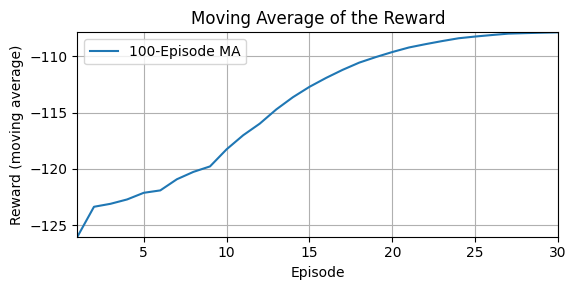

Total episodes: 30


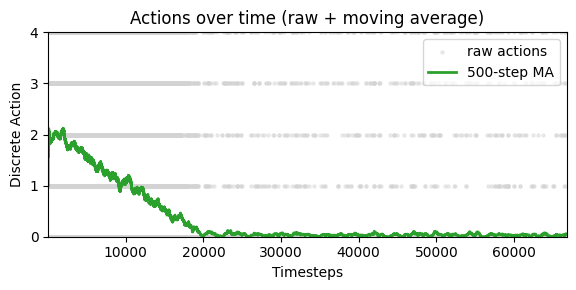

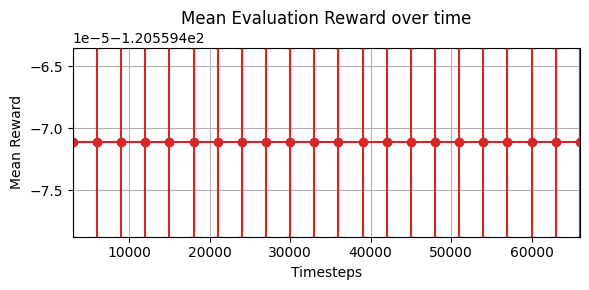

In [15]:
# Training reward
window = 100
smooth = train_callback.ep_df["return"].rolling(window, min_periods=1).mean()
#train_df = train_callback.df  # your TrainLoggerCallback should have produced this
plt.figure(figsize=(6, 3))
plt.plot(train_callback.ep_df["episode_global"], smooth, label=f"{window}-Episode MA", color="C0")
#plt.plot(train_df["step"], train_df["reward"], color="C0")
plt.title("Moving Average of the Reward")
plt.xlabel("Episode")
plt.ylabel("Reward (moving average)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
n_episodes = len(train_callback.ep_df)
print(f"Total episodes: {n_episodes}")
"""
# Training loss (if available)
if hasattr(train_callback, "losses") and len(train_callback.losses) > 0:
    plt.figure(figsize=(6, 3))
    plt.plot(train_callback.loss_timesteps,
             train_callback.losses,
             marker='.', linestyle='-',
             alpha=0.7, color="C1")
    plt.title("Train Loss over time")
    plt.xlabel("Timesteps")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
"""
train_df = train_callback.df  

# Actions (raw + moving average)
plt.figure(figsize=(6, 3))
# raw scatter
plt.scatter(
    train_df["global_step"],
    train_df["action"],
    c="lightgray", s=5, alpha=0.4,
    label="raw actions"
)
# moving average
window = 500
train_df["action_ma"] = train_df["action"].rolling(window, min_periods=1).mean()
plt.plot(
    train_df["global_step"],
    train_df["action_ma"],
    color="C2", lw=2,
    label=f"{window}-step MA"
)
plt.title("Actions over time (raw + moving average)")
plt.xlabel("Timesteps")
plt.ylabel("Discrete Action")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

# Evaluation results
all_eval = eval_callback.evaluations_results        # list of lists
steps    = eval_callback.evaluations_timesteps      # list of ints

# Compute per‐evaluation mean/std
mean_eval = [float(np.mean(r)) for r in all_eval]
std_eval  = [float(np.std(r))  for r in all_eval]

plt.figure(figsize=(6, 3))
plt.errorbar(
    steps, mean_eval,
    yerr=std_eval,
    fmt='-o', capsize=3, color="C3",
    label="Eval mean ±1σ"
)
plt.title("Mean Evaluation Reward over time")
plt.xlabel("Timesteps")
plt.ylabel("Mean Reward")
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
from citylearn.citylearn import CityLearnEnv
from citylearn.agents.rbc import HourRBC
from ipywidgets import IntProgress, Text, VBox

rbc_env = CityLearnEnv(schema)


class CustomRBC(HourRBC):
   def __init__(
       self, env: CityLearnEnv, action_map: Mapping[int, float] = None,
       loader: IntProgress = None
    ):
      r"""Initialize CustomRBC.

      Parameters
      ----------
      env: Mapping[str, CityLearnEnv]
         CityLearn environment instance.
      action_map: Mapping[int, float]
         Mapping of hour to control action.
      loader: IntProgress
         Progress bar.
      """

      super().__init__(env=env, action_map=action_map)
      self.loader = loader

   def next_time_step(self):
      r"""Advance to next `time_step`."""

      super().next_time_step()

      if self.loader is not None:
         self.loader.value += 1
      else:
         pass

action_map = {i: 0.0 for i in range(1, 25)}
rbc_model = CustomRBC(env=rbc_env, action_map=action_map)
print('default RBC action map:', action_map)

c:\Users\johann\anaconda3\envs\citylearn\lib\site-packages\citylearn\citylearn.py:31: DeprecationWarning: private variables, such as '_EvaluationCondition__DEFAULT', will be normal attributes in 3.10
  __DEFAULT = ''
c:\Users\johann\anaconda3\envs\citylearn\lib\site-packages\citylearn\citylearn.py:32: DeprecationWarning: private variables, such as '_EvaluationCondition__STORAGE_SUFFIX', will be normal attributes in 3.10
  __STORAGE_SUFFIX = '_without_storage'
c:\Users\johann\anaconda3\envs\citylearn\lib\site-packages\citylearn\citylearn.py:33: DeprecationWarning: private variables, such as '_EvaluationCondition__PARTIAL_LOAD_SUFFIX', will be normal attributes in 3.10
  __PARTIAL_LOAD_SUFFIX = '_and_partial_load'
c:\Users\johann\anaconda3\envs\citylearn\lib\site-packages\citylearn\citylearn.py:34: DeprecationWarning: private variables, such as '_EvaluationCondition__PV_SUFFIX', will be normal attributes in 3.10
  __PV_SUFFIX = '_and_pv'
c:\Users\johann\anaconda3\envs\citylearn\lib\site-

default RBC action map: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0}
